In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [3]:
def display_image(img_array):
    img_array = img_array.reshape((28, 28))
    plt.imshow(img_array, cmap='gray')
    plt.show()

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

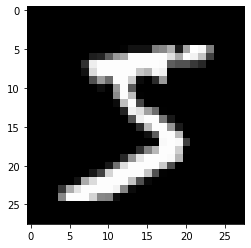

In [6]:
display_image(x_train[0])

In [7]:
y_train[0]

5

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [9]:
# the model returns a vector of "logits" or "log-odds" scores, one for each class.
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.43851453,  0.2940838 ,  0.16664779,  0.34365624, -0.16490032,
         0.17777851, -0.3926602 ,  0.03529724, -0.13502982, -0.83487356]],
      dtype=float32)

In [10]:
# The tf.nn.softmax function converts these logits to "probabilities" for each class
predictions = tf.nn.softmax(predictions).numpy()
predictions

array([[0.06691039, 0.1392057 , 0.12254969, 0.14628036, 0.0879676 ,
        0.12392138, 0.07004996, 0.1074651 , 0.09063487, 0.04501498]],
      dtype=float32)

In [11]:
np.argmax(predictions)

3

In [12]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [13]:
loss_fn(y_train[:1], predictions).numpy()

2.279166

In [14]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2966 - accuracy: 0.9143
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1415 - accuracy: 0.9581
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1080 - accuracy: 0.9677
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0871 - accuracy: 0.9732
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0760 - accuracy: 0.9764
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0664 - accuracy: 0.9787
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0581 - accuracy: 0.9809
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0525 - accuracy: 0.9826
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0493 - accuracy: 0.9834
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.042

In [16]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0630 - accuracy: 0.9812


[0.06297966092824936, 0.9811999797821045]

In [17]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

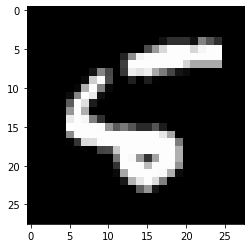

Label: 5
Predict: 6


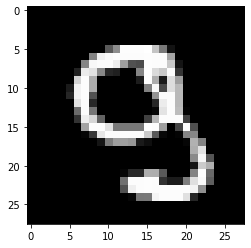

Label: 9
Predict: 8


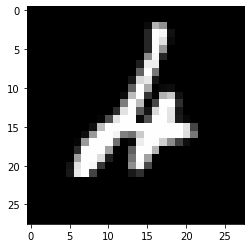

Label: 4
Predict: 2


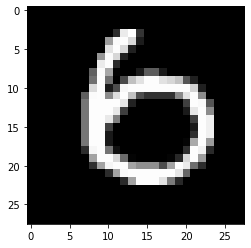

Label: 6
Predict: 0


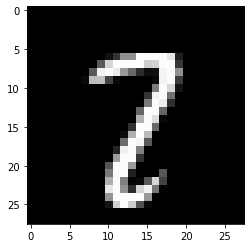

Label: 2
Predict: 7


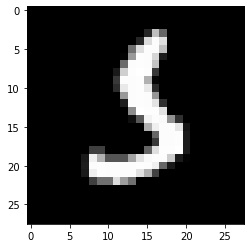

Label: 5
Predict: 3


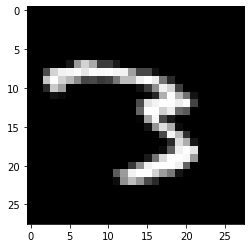

Label: 3
Predict: 7


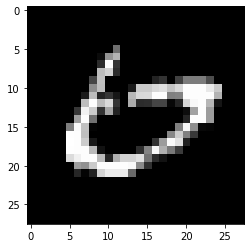

Label: 6
Predict: 0


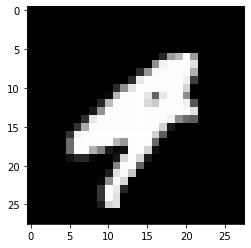

Label: 4
Predict: 9


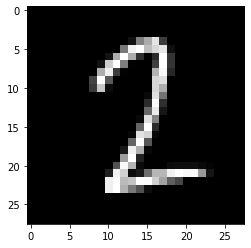

Label: 2
Predict: 1


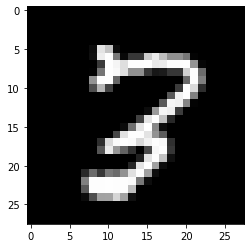

Label: 3
Predict: 7


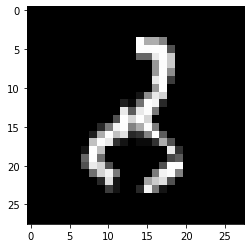

Label: 8
Predict: 2


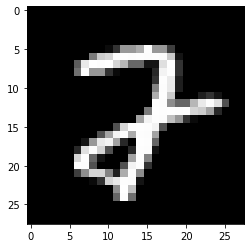

Label: 2
Predict: 7


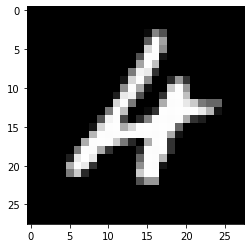

Label: 4
Predict: 6


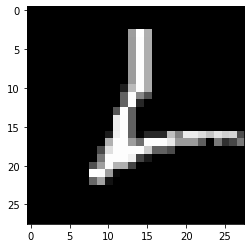

Label: 2
Predict: 6


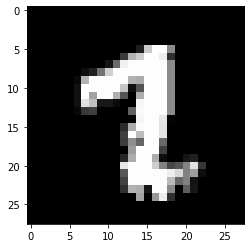

Label: 2
Predict: 1


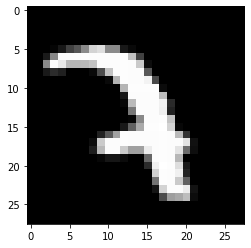

Label: 7
Predict: 3


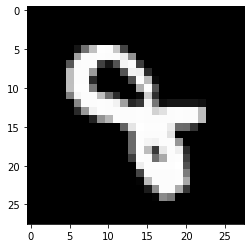

Label: 8
Predict: 4


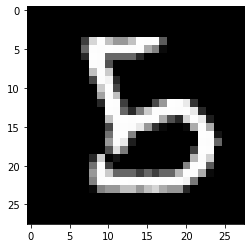

Label: 5
Predict: 8


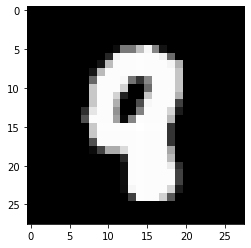

Label: 8
Predict: 9


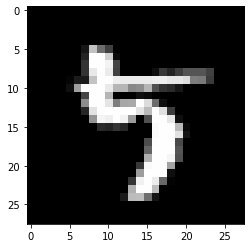

Label: 5
Predict: 4


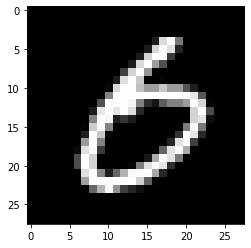

Label: 6
Predict: 0


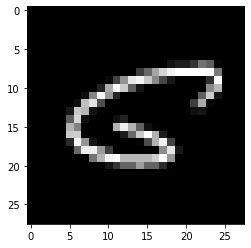

Label: 6
Predict: 5


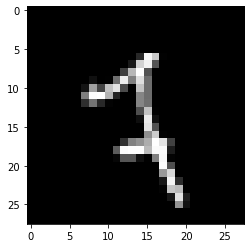

Label: 7
Predict: 8


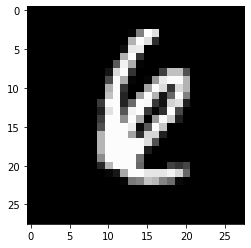

Label: 6
Predict: 8


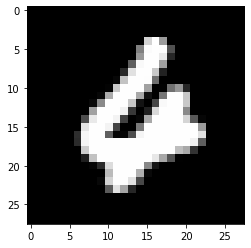

Label: 4
Predict: 6


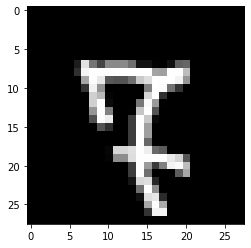

Label: 7
Predict: 8


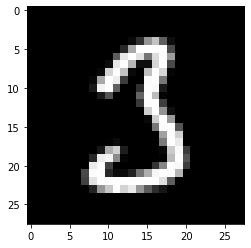

Label: 3
Predict: 5


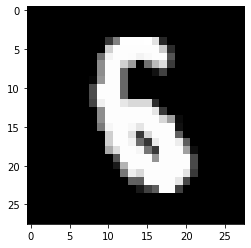

Label: 6
Predict: 8


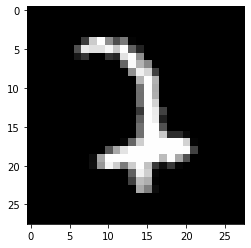

Label: 7
Predict: 2


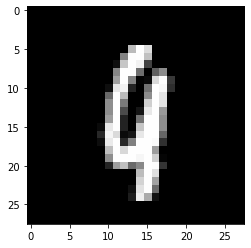

Label: 9
Predict: 4


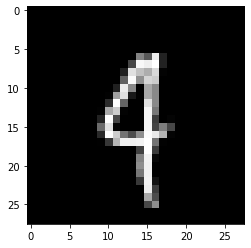

Label: 4
Predict: 9


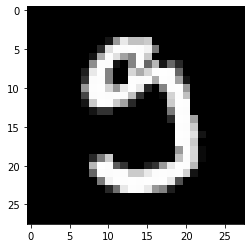

Label: 9
Predict: 5


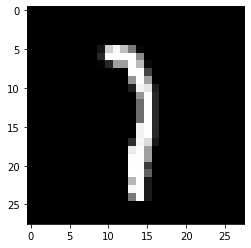

Label: 7
Predict: 1


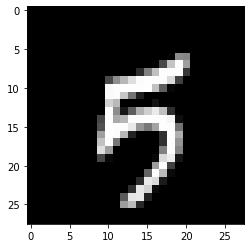

Label: 5
Predict: 9


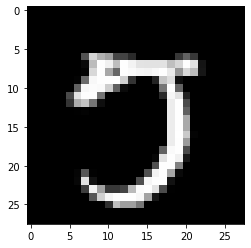

Label: 5
Predict: 7


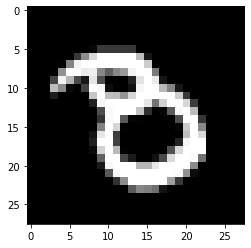

Label: 8
Predict: 0


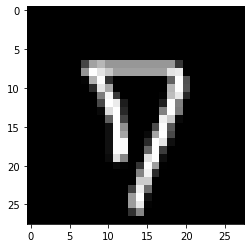

Label: 7
Predict: 9


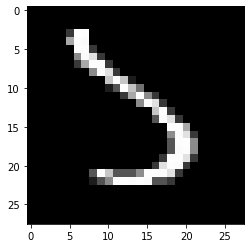

Label: 5
Predict: 3


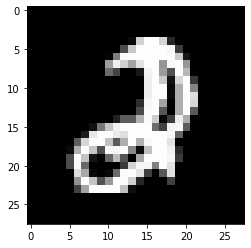

Label: 2
Predict: 3


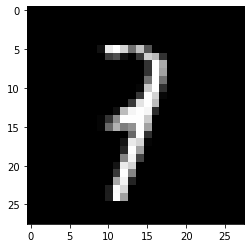

Label: 7
Predict: 1


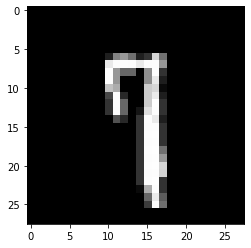

Label: 7
Predict: 9


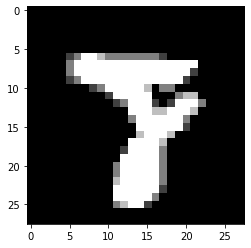

Label: 8
Predict: 7


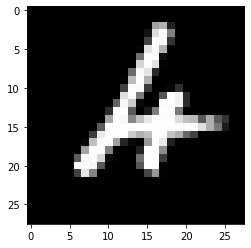

Label: 4
Predict: 6


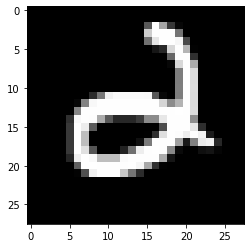

Label: 2
Predict: 6


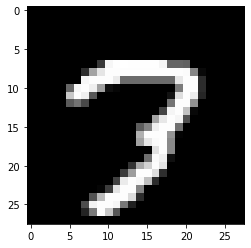

Label: 3
Predict: 7


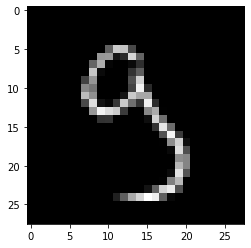

Label: 9
Predict: 5


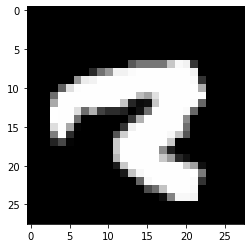

Label: 2
Predict: 8


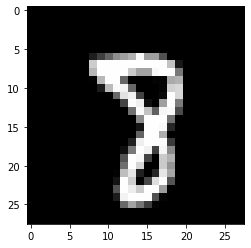

Label: 8
Predict: 9


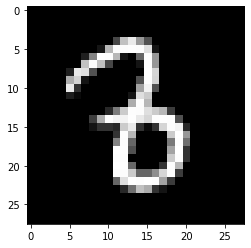

Label: 8
Predict: 3


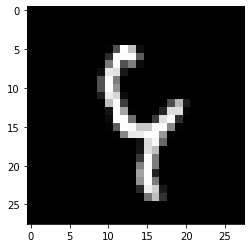

Label: 9
Predict: 4


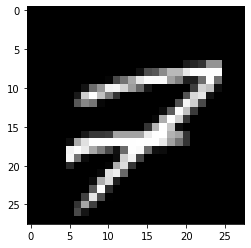

Label: 7
Predict: 2


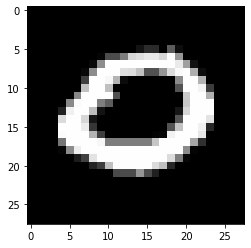

Label: 0
Predict: 9


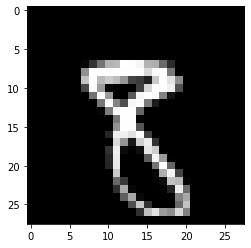

Label: 8
Predict: 9


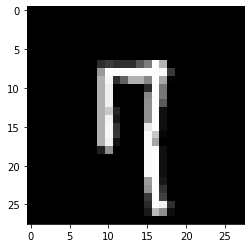

Label: 7
Predict: 9


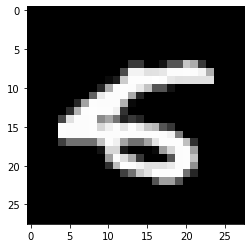

Label: 5
Predict: 4


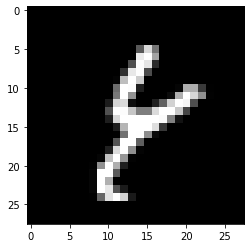

Label: 4
Predict: 8


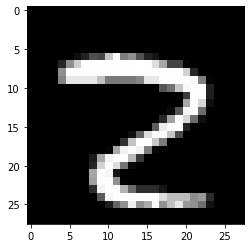

Label: 2
Predict: 7


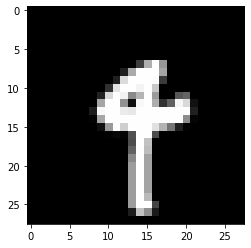

Label: 4
Predict: 9


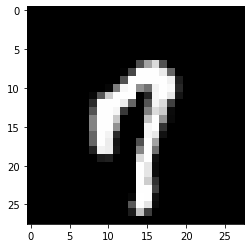

Label: 7
Predict: 9


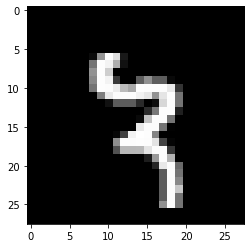

Label: 3
Predict: 7


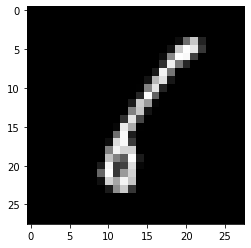

Label: 6
Predict: 1


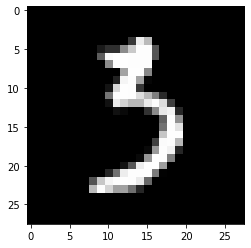

Label: 3
Predict: 5


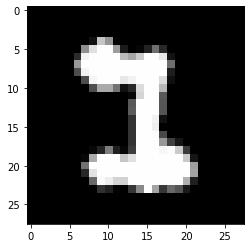

Label: 1
Predict: 2


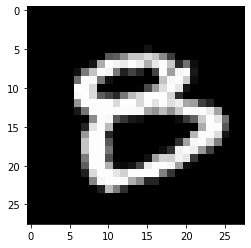

Label: 8
Predict: 0


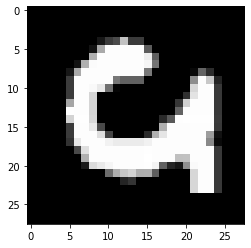

Label: 9
Predict: 0


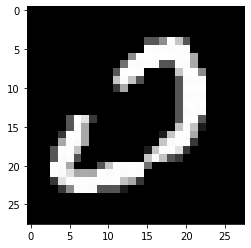

Label: 0
Predict: 2


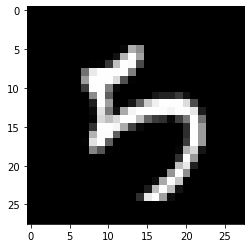

Label: 5
Predict: 7


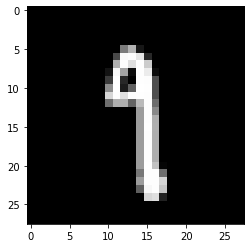

Label: 9
Predict: 1


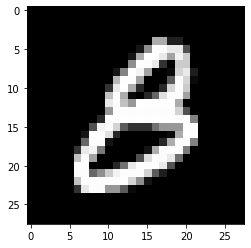

Label: 8
Predict: 3


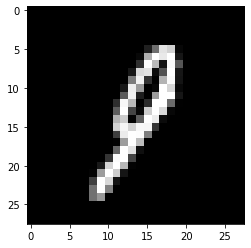

Label: 9
Predict: 1


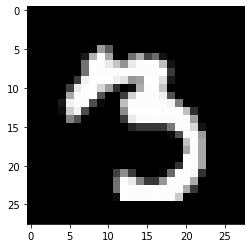

Label: 3
Predict: 9


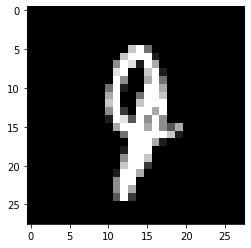

Label: 9
Predict: 4


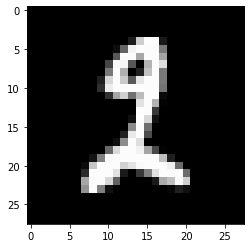

Label: 2
Predict: 1


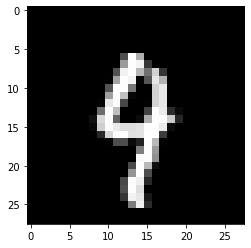

Label: 4
Predict: 9


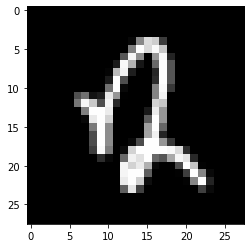

Label: 2
Predict: 4


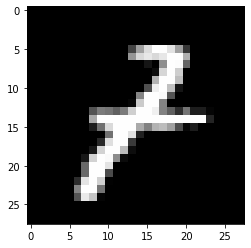

Label: 7
Predict: 1


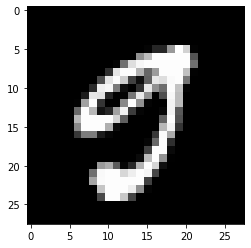

Label: 9
Predict: 5


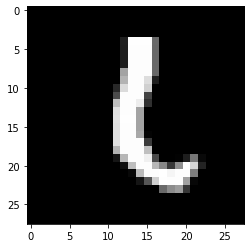

Label: 6
Predict: 1


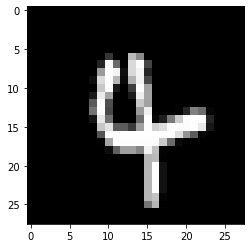

Label: 4
Predict: 7


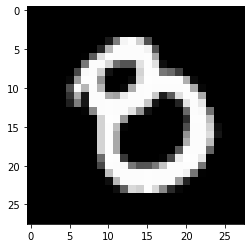

Label: 8
Predict: 0


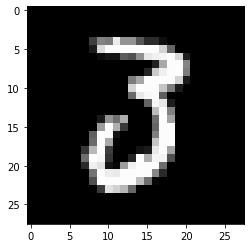

Label: 3
Predict: 2


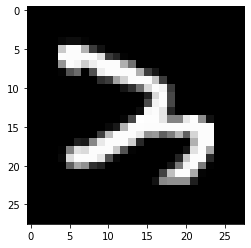

Label: 3
Predict: 2


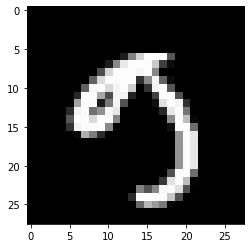

Label: 9
Predict: 5


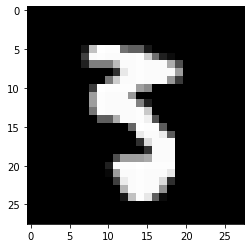

Label: 3
Predict: 5


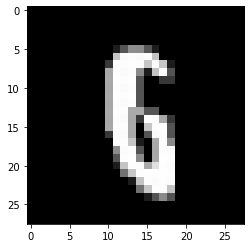

Label: 6
Predict: 8


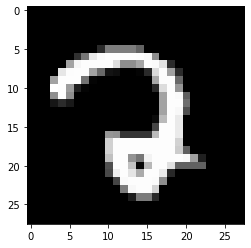

Label: 2
Predict: 7


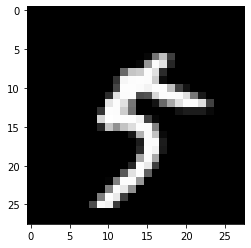

Label: 5
Predict: 9


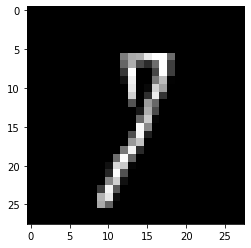

Label: 7
Predict: 9


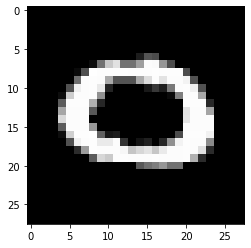

Label: 0
Predict: 9


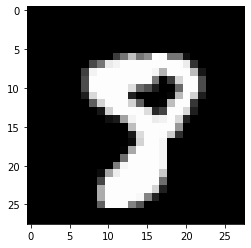

Label: 8
Predict: 9


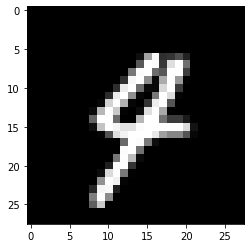

Label: 4
Predict: 9


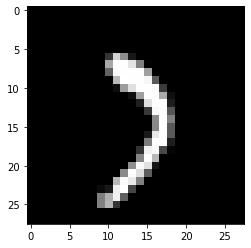

Label: 7
Predict: 9


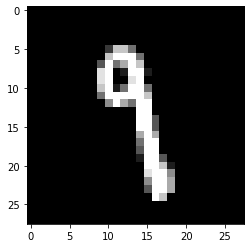

Label: 9
Predict: 1


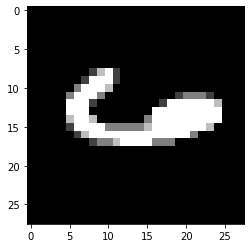

Label: 6
Predict: 4


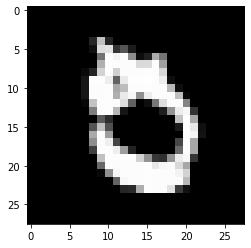

Label: 5
Predict: 0


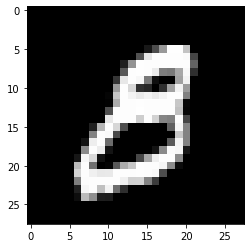

Label: 8
Predict: 3


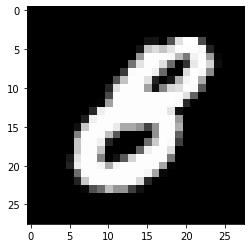

Label: 8
Predict: 6


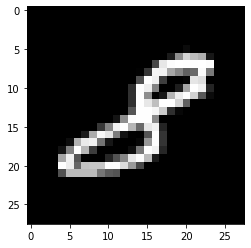

Label: 8
Predict: 3


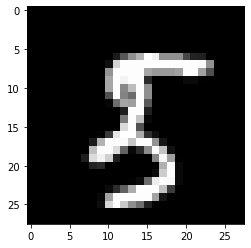

Label: 5
Predict: 8


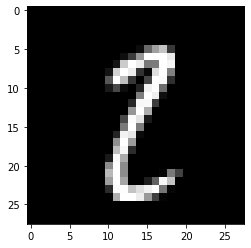

Label: 2
Predict: 8


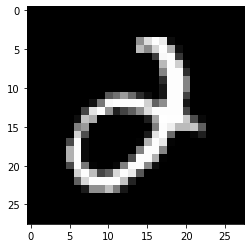

Label: 2
Predict: 0


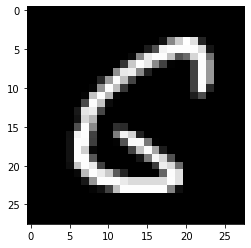

Label: 6
Predict: 2


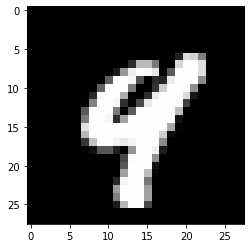

Label: 9
Predict: 4


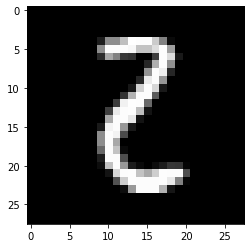

Label: 2
Predict: 8


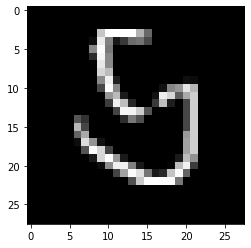

Label: 5
Predict: 6


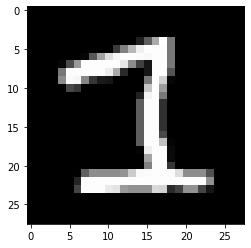

Label: 1
Predict: 2


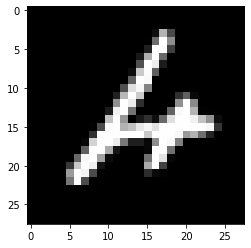

Label: 4
Predict: 2


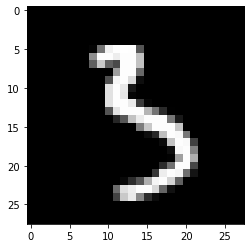

Label: 3
Predict: 5


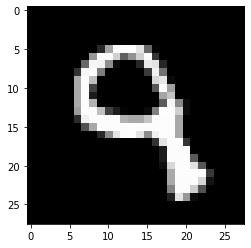

Label: 9
Predict: 8


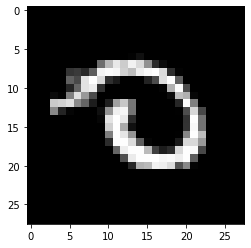

Label: 0
Predict: 3


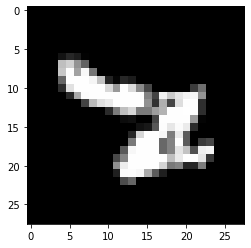

Label: 2
Predict: 7


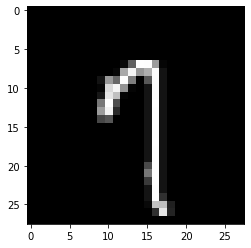

Label: 7
Predict: 9


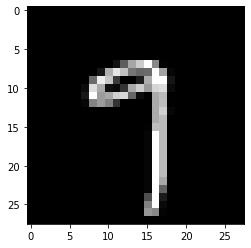

Label: 9
Predict: 7


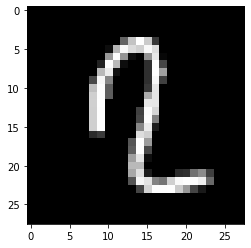

Label: 2
Predict: 8


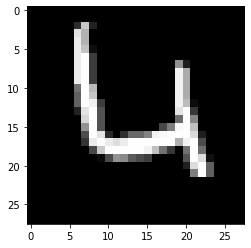

Label: 4
Predict: 6


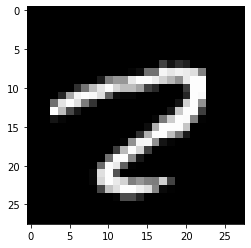

Label: 2
Predict: 7


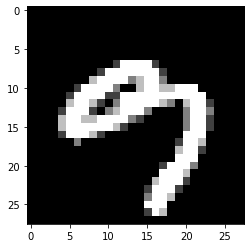

Label: 9
Predict: 7


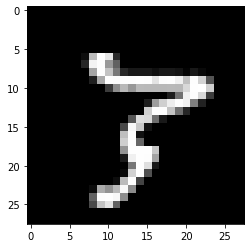

Label: 3
Predict: 7


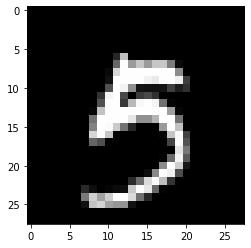

Label: 5
Predict: 3


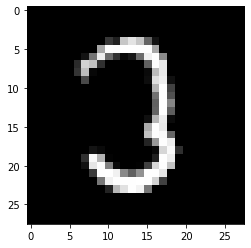

Label: 3
Predict: 2


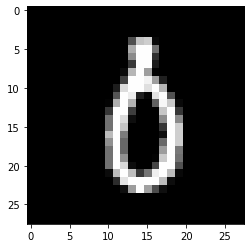

Label: 0
Predict: 6


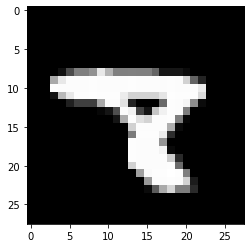

Label: 8
Predict: 7


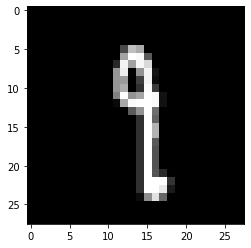

Label: 9
Predict: 1


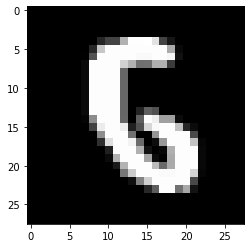

Label: 6
Predict: 5


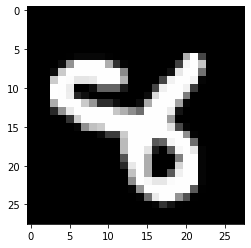

Label: 8
Predict: 4


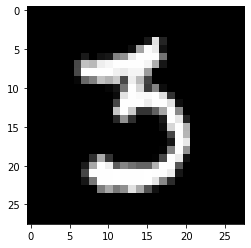

Label: 3
Predict: 5


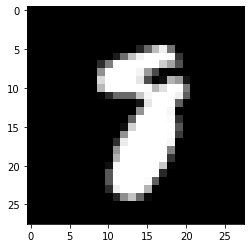

Label: 8
Predict: 7


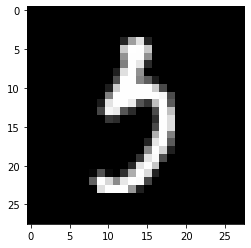

Label: 3
Predict: 5


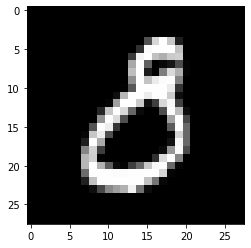

Label: 8
Predict: 3


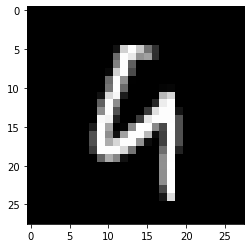

Label: 9
Predict: 4


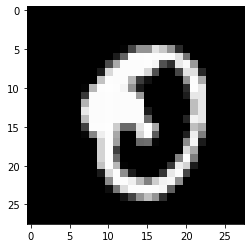

Label: 0
Predict: 8


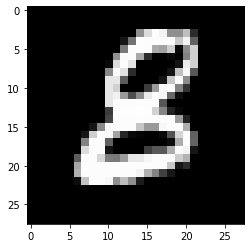

Label: 8
Predict: 3


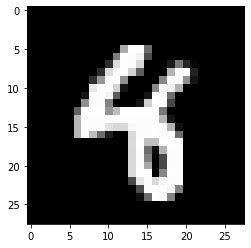

Label: 8
Predict: 4


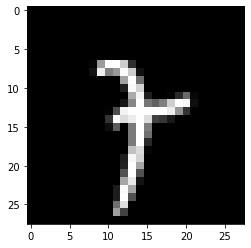

Label: 7
Predict: 1


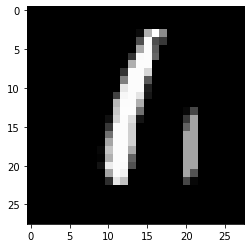

Label: 1
Predict: 6


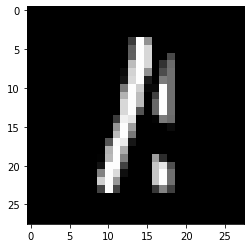

Label: 1
Predict: 8


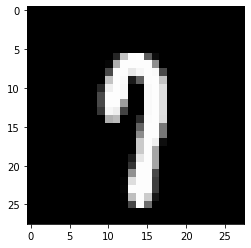

Label: 7
Predict: 9


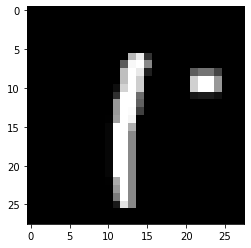

Label: 1
Predict: 8


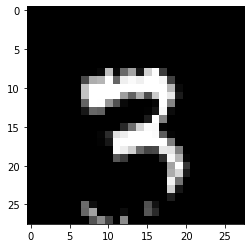

Label: 3
Predict: 7


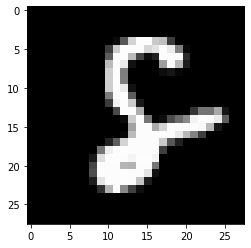

Label: 8
Predict: 5


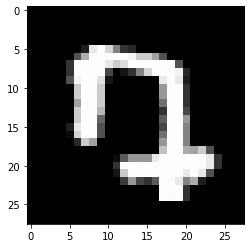

Label: 7
Predict: 0


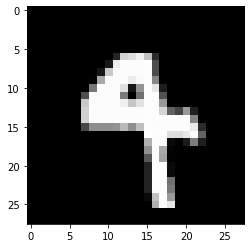

Label: 4
Predict: 9


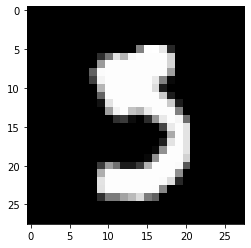

Label: 5
Predict: 3


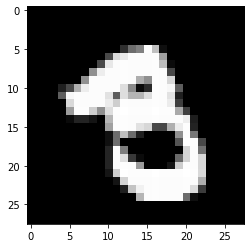

Label: 3
Predict: 8


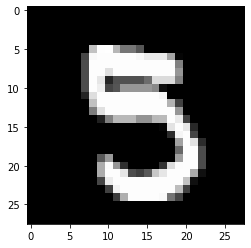

Label: 5
Predict: 3


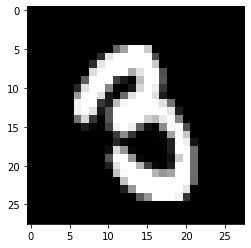

Label: 3
Predict: 8


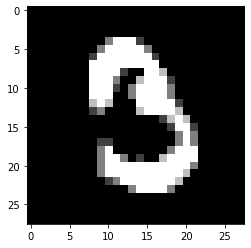

Label: 3
Predict: 9


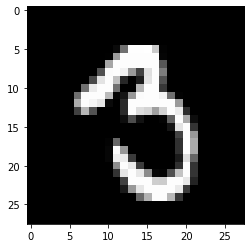

Label: 3
Predict: 9


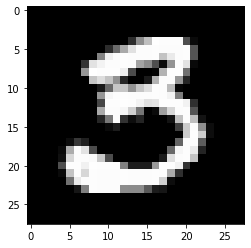

Label: 3
Predict: 5


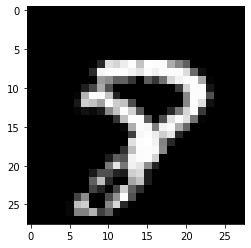

Label: 8
Predict: 9


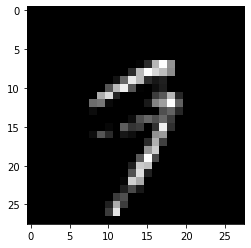

Label: 9
Predict: 7


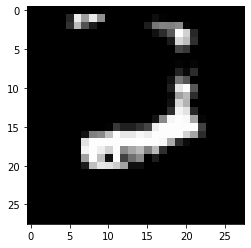

Label: 2
Predict: 6


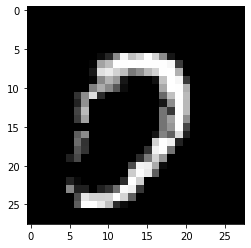

Label: 0
Predict: 7


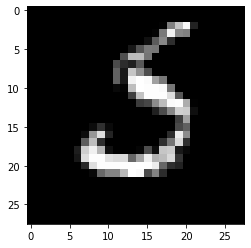

Label: 5
Predict: 3


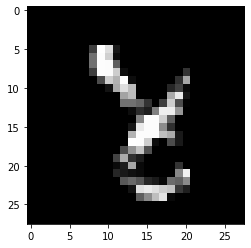

Label: 8
Predict: 4


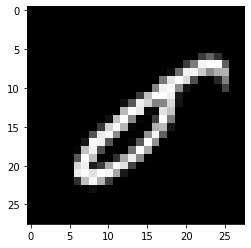

Label: 0
Predict: 5


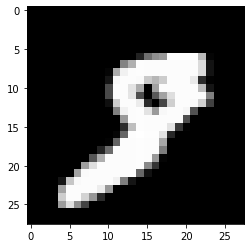

Label: 8
Predict: 7


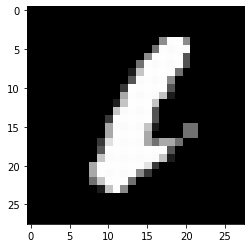

Label: 1
Predict: 6


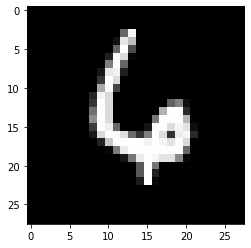

Label: 6
Predict: 4


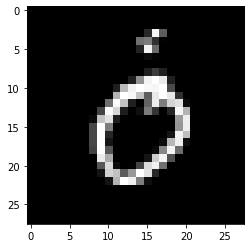

Label: 0
Predict: 6


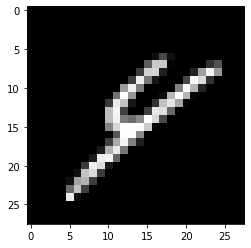

Label: 4
Predict: 9


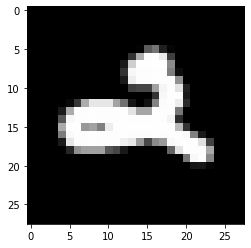

Label: 2
Predict: 4


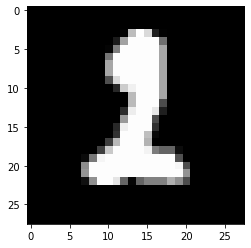

Label: 2
Predict: 1


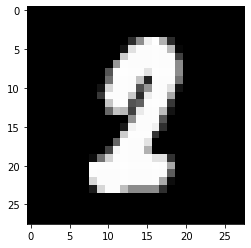

Label: 2
Predict: 8


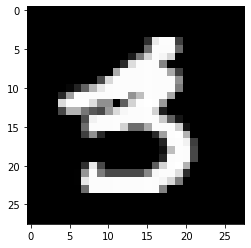

Label: 3
Predict: 9


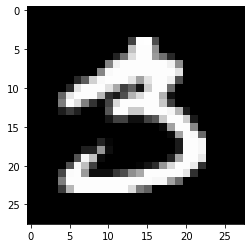

Label: 3
Predict: 5


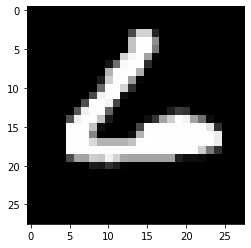

Label: 6
Predict: 4


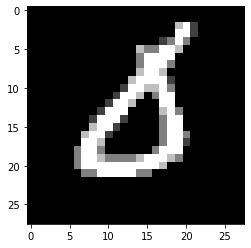

Label: 0
Predict: 6


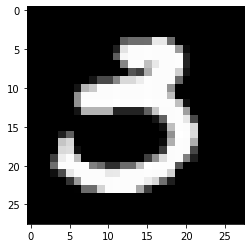

Label: 3
Predict: 5


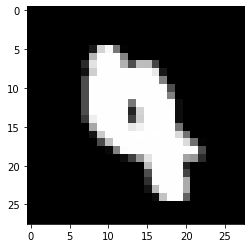

Label: 4
Predict: 9


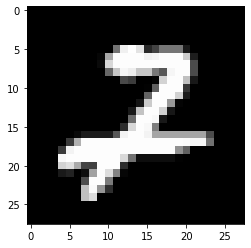

Label: 7
Predict: 2


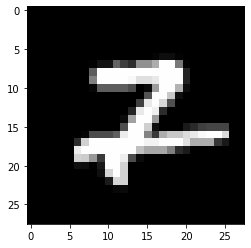

Label: 7
Predict: 2


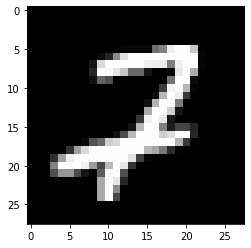

Label: 7
Predict: 2


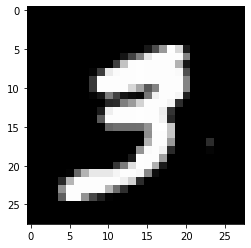

Label: 3
Predict: 9


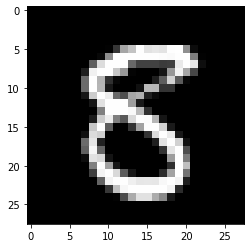

Label: 8
Predict: 5


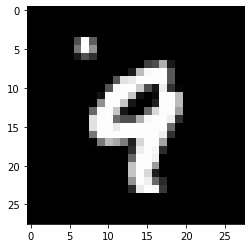

Label: 9
Predict: 4


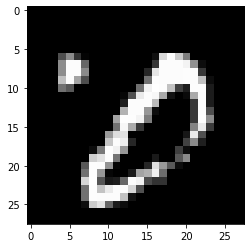

Label: 0
Predict: 1


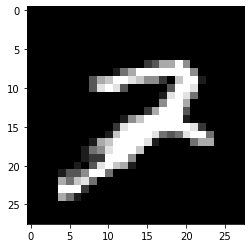

Label: 2
Predict: 7


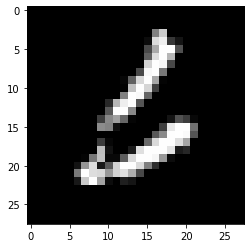

Label: 6
Predict: 3


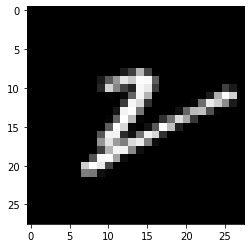

Label: 2
Predict: 8


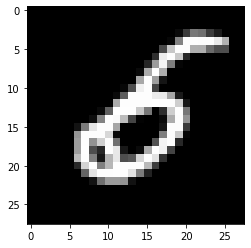

Label: 5
Predict: 6


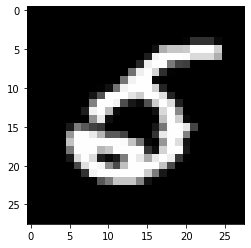

Label: 5
Predict: 6


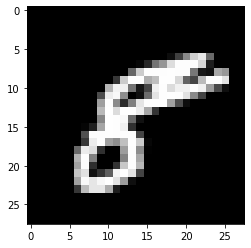

Label: 8
Predict: 5


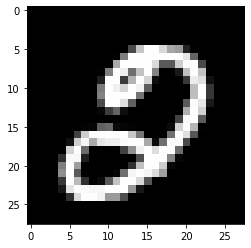

Label: 2
Predict: 0


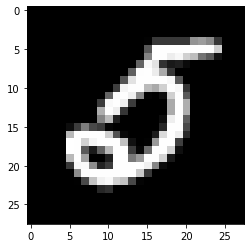

Label: 5
Predict: 0


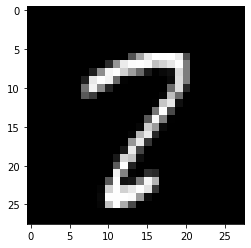

Label: 2
Predict: 7


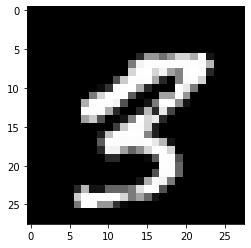

Label: 3
Predict: 5


In [18]:
true = 0
false = 0
total = 0
prediction_array = probability_model(x_test).numpy()
for img, label, predic_probability in zip(x_test, y_test, prediction_array):
    predict = np.argmax(predic_probability)
    if label == predict:
        true += 1
    else:
        false += 1
        display_image(img)
        print('Label: {}\nPredict: {}'.format(label, predict))
    total += 1

In [19]:
accuracy = true / total
print('True: {}\nFalse: {}\nTotal: {}\nAccuracy: {}'.format(true, false, total, accuracy))

True: 9812
False: 188
Total: 10000
Accuracy: 0.9812
